# Understanding School Performance on Pennsylvania Standardized Tests

## Exploratory Data Analysis

The exploratory data analysis stage of this project will be driven by questions regarding the data, the distributions of features, and the relationships of the features with our target variables.

The first part of the EDA will be done here in this notebook, using Python packages such as matplotlib.pyplot and seaborn.

The second part of the EDA will be done in Tableau. The link to the slides on Tableau Public is included [here](https://public.tableau.com/app/profile/christopher.chung6215/viz/02_EDA_Tableau/PASchoolPerformanceEDA) as well as later in this notebook, and the Tableau workbook file is included in the GitHub repository for this project.


### <u>Questions</u>

<b>The following questions will be explored in this jupyter notebook:</b>

- From which sources do schools tend to spend more money per student? Local, state, or federal?


- Do schools tend to spend more money per student on Personnel or Non-Personnel?

<b>The following questions will be explored in Tableau</b>:

- How does attendance relate to school performance on Math and ELA?


- Does gender make-up have any correlation with school performance on Math and ELA?


- How do the following racial/ethnic compositions of schools relate to school performance on Math and ELA?
    - American Indian/Alaskan Native
    - Asian
    - Black/African American
    - Hispanic  


- How do socioeconomic demographics of schools relate to school performance on Math and ELA?
    - Economically Disadvantaged
    - Foster Care
    - Homeless


- How do do the different learning style compositions of schools relate to school performance on Math and ELA?
    - English Learner
    - Special Education
    - Percent of Gifted Students
    

- What is the relationship between expenditures and school performance on Math and ELA?
    - Local - Non-Personnel 
    - Local - Personnel
    - Total Local Expenditure
    - State - Non-Personnel
    - State - Personnel
    - Total State Expenditure
    - Federal - Non-Personnel
    - Federal - Personnel
    - Total Federal Expenditure
    - Total Expenditure


- Title I exploration
    - How does the performance of Title I schools compare to that of non-Title I schools?  
    - How do Title I schools' expenditures compare to non-Title I schools?  
    - Do they have higher federal expenditures and lower local expenditures per student compared to non-Title I schools?  
    - What about their total expenditures?
    - What is the racial demographic make up of Title I schools vs non-Title I schools?



- If we focus on the map of the greater Phildelphia region, where do we see more schools with higher performance?
    - How does this compare to locations where school spend more money?
    - How does this compare with racial/socioeconomic demographic distributions across schools in PA?

### Contents:
1. [Import packages and load data](#section1)
2. [Feature engineering expenditures](#section2)
3. [Distributions and summary statistics](#section3)
4. [Examining expenditures](#section4)
5. [Correlation heatmap](#section5)
6. [Tableau exploration](#section6)
7. [Summary of Findings](#section7)

<a id='section1'></a>

## 1. Import packages and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load cleaned data from csv file
df = pd.read_csv('../Data/school_data_1819.csv', index_col = 0)

In [3]:
#check datatypes
df.dtypes

SchoolName                                                             object
SchoolNumber                                                            int64
School Zip Code                                                         int64
DistrictName                                                           object
AUN                                                                     int64
Title I School                                                         object
School Enrollment                                                       int64
Male (School)                                                         float64
Female (School)                                                       float64
Percent Regular Attendance (All Student)                              float64
American Indian/Alaskan Native                                        float64
Asian                                                                 float64
Black/African American                                          

The following columns are not numeric features, so we will convert them to objects:
- SchoolNumber
- School Zip Code
- AUN

In [4]:
#convert columns to object
cols = ['SchoolNumber',
        'School Zip Code',
        'AUN']

for col in cols:
    df[col]=df[col].astype(str)

In [5]:
#check dtypes again
df.dtypes

SchoolName                                                             object
SchoolNumber                                                           object
School Zip Code                                                        object
DistrictName                                                           object
AUN                                                                    object
Title I School                                                         object
School Enrollment                                                       int64
Male (School)                                                         float64
Female (School)                                                       float64
Percent Regular Attendance (All Student)                              float64
American Indian/Alaskan Native                                        float64
Asian                                                                 float64
Black/African American                                          

We'll also create a new column that will give us the binary representation of 'Title I School', where 0 represents 'No' and 1 represents 'Yes.

In [6]:
df['Title I (Binary)'] = df['Title I School'].map(
                   {'No':0 ,'Yes':1})

<a id='section2'></a>
## 2. Feature engineering expenditures

We have six features that correspond to expenditures per student from various sources:

- <b>Local - Non-Personnel</b>
- <b>Local - Personnel</b>
- <b>State - Non-Personnel</b>
- <b>State - Personnel</b>
- <b>Federal - Non-Personnel</b>
- <b>Federal - Personnel</b>
    
From this, we'll combine expenditures from the same sources (i.e. add <b>Local - Non-Personnel</b> and <b>Local - Personnel</b> to create <b>Total Local Expenditures</b>).  We'll also add up all expenditures to create <b>Total Expenditures</b>.  We'll also add up all expenditures for Personnel and Non-Personnel.

In [7]:
#add up expenditures from the same source
df['Total Local Expenditure'] = df['Local - Non-Personnel'] + df['Local - Personnel']
df['Total State Expenditure'] = df['State - Non-Personnel'] + df['State - Personnel']
df['Total Federal Expenditure'] = df['Federal - Non-Personnel'] + df['Federal - Personnel']

#add up expenditures for Personnel and Non-Personnel
df['Total Non-Personnel Expenditure'] = df['Local - Non-Personnel'] + df['State - Non-Personnel'] + df['Federal - Non-Personnel']
df['Total Personnel Expenditure'] = df['Local - Personnel'] + df['State - Personnel'] + df['Federal - Personnel']

#add up for grand total expenditure
df['Total Expenditure'] = df['Total Local Expenditure'] + df['Total State Expenditure'] + df['Total Federal Expenditure']

In [8]:
# list of reordered columns

ordered_cols = ['SchoolName', 
                'SchoolNumber',
                'School Zip Code',
                'DistrictName', 
                'AUN', 
                
                'Title I School',
                'Title I (Binary)',
                'School Enrollment',
                
                'Male (School)',
                'Female (School)',
                
                'Percent Regular Attendance (All Student)',
                
                'American Indian/Alaskan Native', 
                'Asian', 
                'Black/African American',
                'Hispanic',
                'Native Hawaiian or other Pacific Islander',
                'White',
                '2 or More Races',
                
                'English Learner',
                'Special Education',
                'Percent of Gifted Students',
                
                'Economically Disadvantaged',
                'Foster Care',
                'Homeless',
                'Military Connected',
                
                'Local - Non-Personnel', 
                'Local - Personnel',
                'Total Local Expenditure',
                'State - Non-Personnel', 
                'State - Personnel',
                'Total State Expenditure',
                'Federal - Non-Personnel',
                'Federal - Personnel', 
                'Total Federal Expenditure',
                
                'Total Non-Personnel Expenditure',
                'Total Personnel Expenditure',
                
                'Total Expenditure',
                
                'Percent Proficient or Advanced ELA/Literature (All Student)',
                'Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)'
               ]

In [9]:
# reorder columns of df using the list above
df=df[ordered_cols]

<a id='section3'></a>
## 3. Distributions and Summary Statistics

In [10]:
#obtain summary statistics for each numeric feature
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Title I (Binary),2673.0,0.587729,0.492336,0.00,0.00,1.00,1.00,1.00
School Enrollment,2673.0,601.311261,465.089134,46.00,362.00,501.00,703.00,10100.00
Male (School),2673.0,51.358178,3.632378,0.12,49.76,51.47,53.07,100.00
Female (School),2673.0,48.641848,3.632382,0.00,46.93,48.53,50.24,99.88
Percent Regular Attendance (All Student),2673.0,86.206958,11.733701,7.50,81.90,89.80,94.30,100.00
American Indian/Alaskan Native,2673.0,0.153345,0.260724,0.00,0.00,0.00,0.23,2.91
Asian,2673.0,3.342450,5.797884,0.00,0.34,1.13,3.82,69.08
Black/African American,2673.0,14.937321,24.928654,0.00,1.24,3.67,13.52,100.00
Hispanic,2673.0,10.492806,16.733130,0.00,1.70,4.12,10.62,99.16
Native Hawaiian or other Pacific Islander,2673.0,0.084516,0.192109,0.00,0.00,0.00,0.10,2.12


As a reminder, there are three expenditure columns that have negative values as the minimum value.  

    Local - Non-Personnel
    State - Non-Personnel
    Federal - Non-Personnel

Since we do not understand the significance of these negative values, and we are unsure as to whether these are errors or correct, we will leave this values as is.

Next, we'll look at the distributions of each of our numeric features.

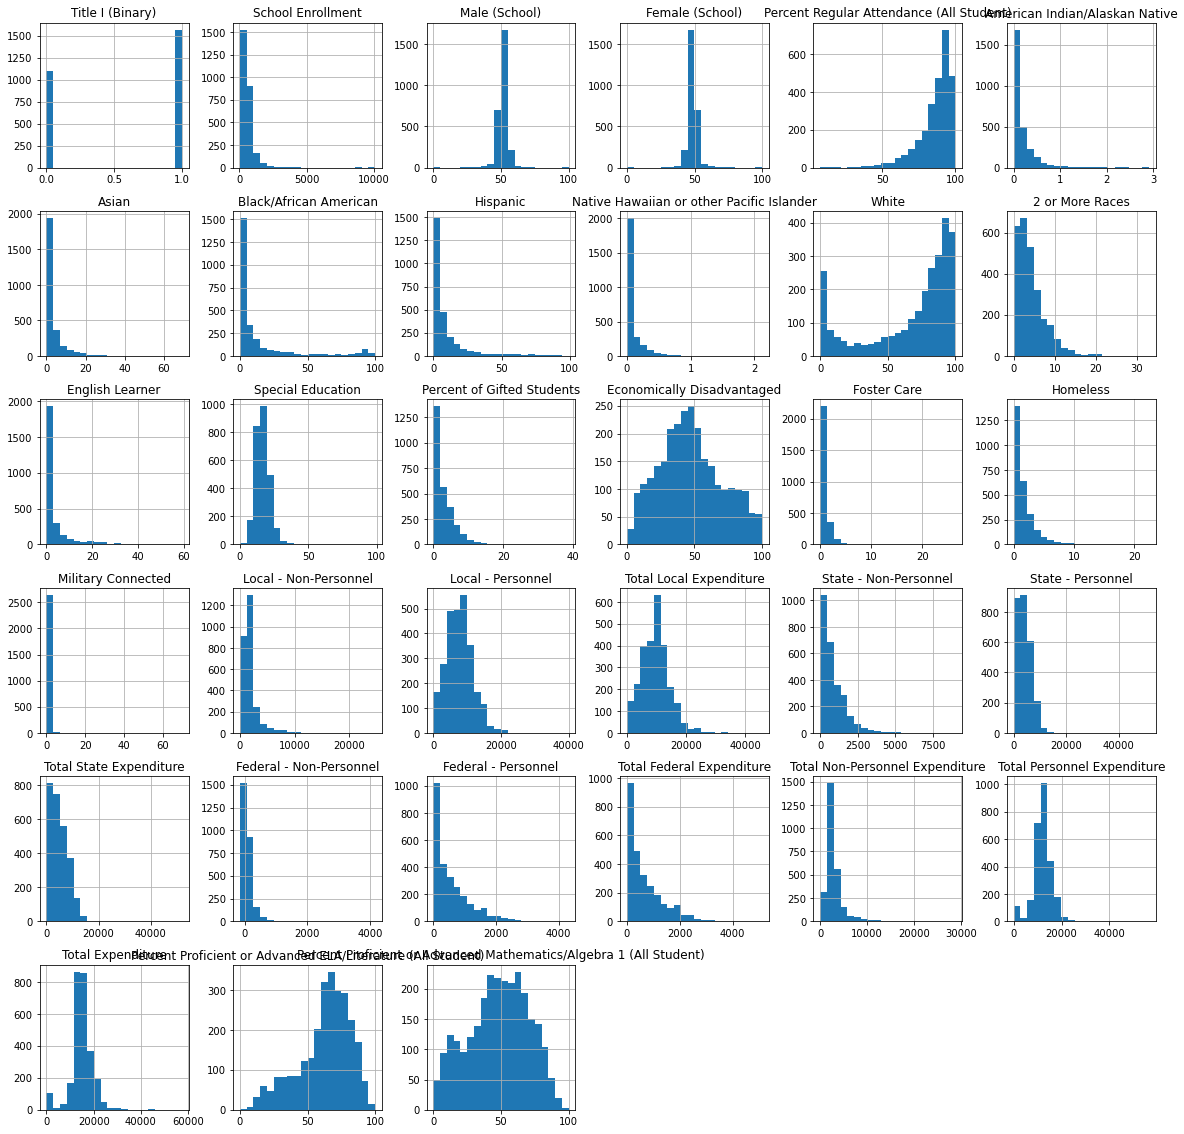

In [11]:
#construct histogram of every numeric feature
df.hist(figsize=(20,20), bins = 20)
plt.show()

<a id='section4'></a>
## 4. Examining expenditures

We'll address the following questions here:
- From which sources do schools tend to spend more money per student? Local, state, or federal?
- Do schools tend to spend more money per student on Personnel or Non-Personnel?

We'll first calculate the mean and median of each group, and then we'll look at the distributions/boxplots.

In [12]:
# create list of columns to filter df
source_cols = ['Total Local Expenditure', 'Total State Expenditure', 'Total Federal Expenditure']

# filter df and get summary statistics
df[source_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total Local Expenditure,2673.0,9559.625960,4746.558766,0.0,6310.65,9619.81,12342.04,45603.88
Total State Expenditure,2673.0,4583.380860,3766.726349,0.0,564.16,4273.48,7098.06,51817.55
Total Federal Expenditure,2673.0,669.644863,695.674432,0.0,137.21,444.50,992.15,5114.33


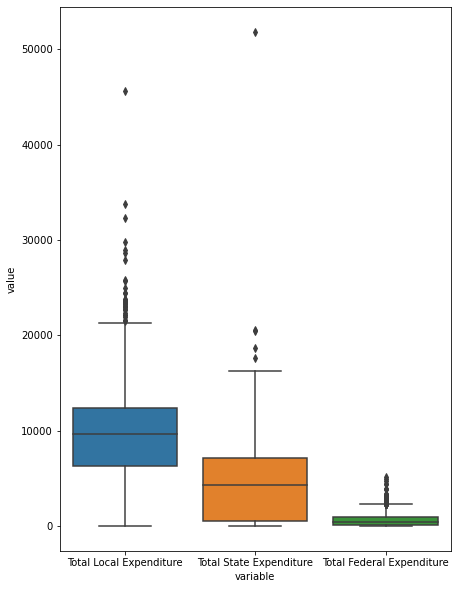

In [13]:
# plot boxplots 
plt.subplots(figsize=(7, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(df[source_cols]))
plt.show()

On average, schools seem to spend the most amount of money from local sources, then state sources, then federal sources.

In [14]:
# create list of columns to filter df
personnel_cols = ['Total Non-Personnel Expenditure', 'Total Personnel Expenditure']

# filter df and get summary statistics
df[personnel_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total Non-Personnel Expenditure,2673.0,2785.177669,1918.391149,0.0,1891.30,2368.13,3281.80,28810.48
Total Personnel Expenditure,2673.0,12027.474014,3980.549358,0.0,10373.81,12021.37,14086.46,56526.15


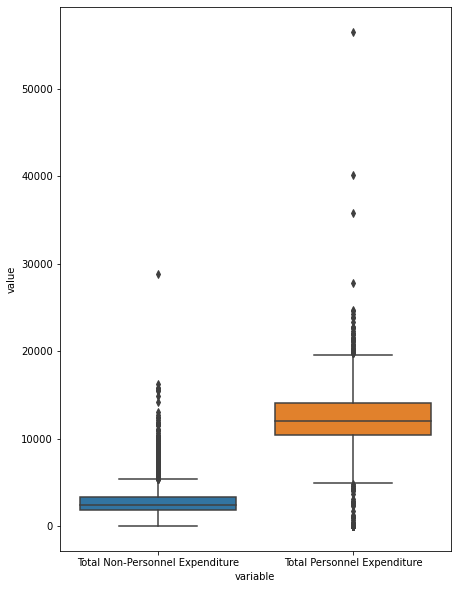

In [15]:
# plot boxplots 
plt.subplots(figsize=(7, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(df[personnel_cols]))
plt.show()

On average, schools spend more money per student on Personnel than Non-Personnel. This may be due to the fact that salaries are a significantly larger cost to schools compared to Non-Personnel related expenditures such as materials, books, school building maintenance, etc.

<a id='section5'></a>
## 5. Correlation heatmap

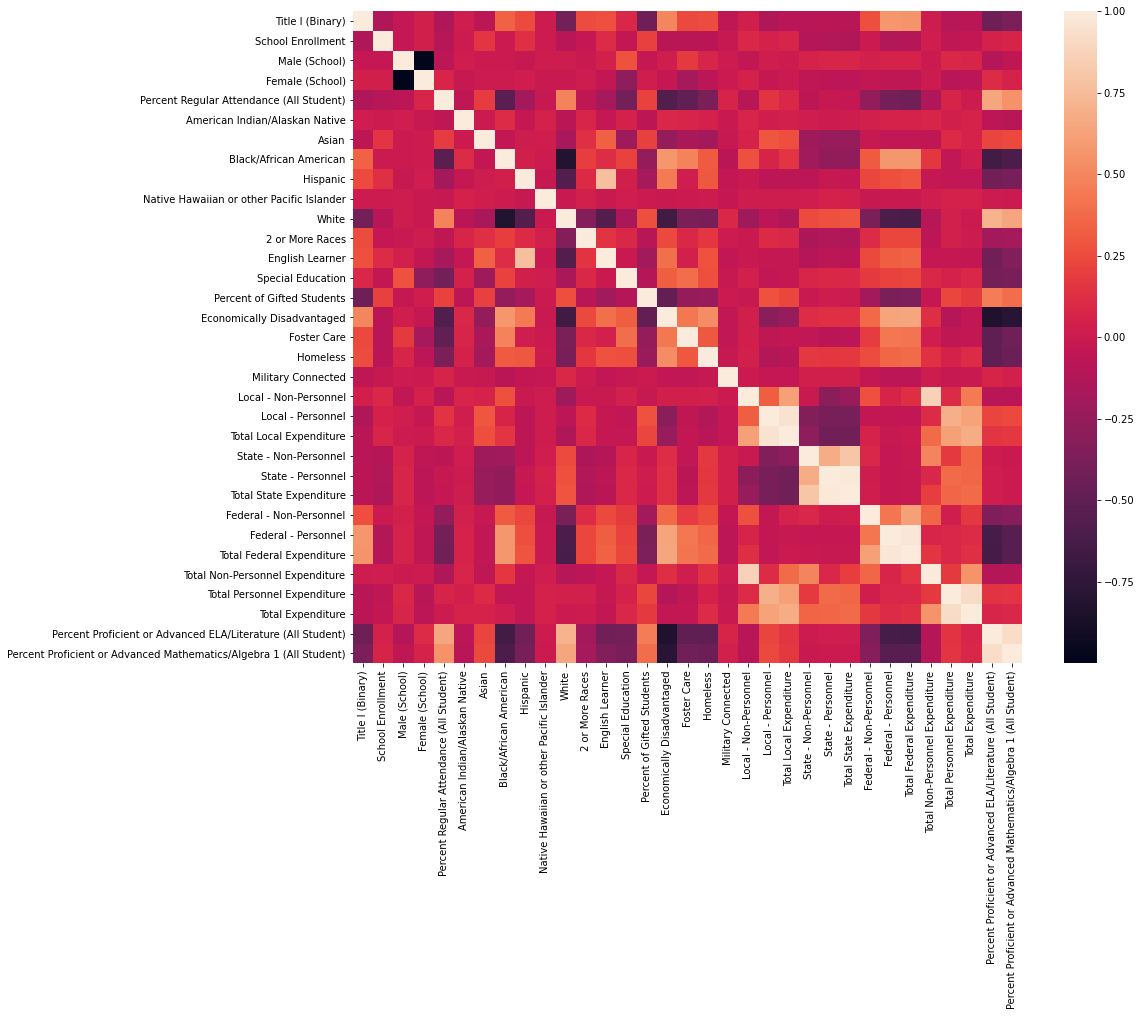

In [16]:
#construct a heatmap of correlation coefficients
plt.subplots(figsize=(15,12))
sns.heatmap(df.corr())
plt.show()

In [17]:
df.corr()['Percent Proficient or Advanced ELA/Literature (All Student)'].sort_values(ascending=False)

Percent Proficient or Advanced ELA/Literature (All Student)           1.000000
Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)    0.923179
White                                                                 0.710579
Percent Regular Attendance (All Student)                              0.642519
Percent of Gifted Students                                            0.453533
Local - Personnel                                                     0.222784
Asian                                                                 0.222755
Total Local Expenditure                                               0.154362
Total Personnel Expenditure                                           0.141492
Female (School)                                                       0.102218
Total Expenditure                                                     0.074267
Military Connected                                                    0.062552
School Enrollment                                   

In [18]:
df.corr()['Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)'].sort_values(ascending=False)

Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)    1.000000
Percent Proficient or Advanced ELA/Literature (All Student)           0.923179
White                                                                 0.641710
Percent Regular Attendance (All Student)                              0.553432
Percent of Gifted Students                                            0.390356
Asian                                                                 0.239192
Local - Personnel                                                     0.238133
Total Local Expenditure                                               0.168860
Total Personnel Expenditure                                           0.154529
Total Expenditure                                                     0.085375
School Enrollment                                                     0.066396
Female (School)                                                       0.059650
Military Connected                                  

Strong positive correlation with target variables:
- White
- Percent Regular Attendance (All Student)
- Percent of Gifted Students
- Asian
- Local - Personnel

Strong negative correlation with target variables:
- Economically Disadvantaged
- Black/African American
- Total Federal Expenditure
- Federal - Personnel
- Homeless
- Foster Care
- Hispanic
- Title I (Binary)
- English Learner
- Special Education
- Federal - Non-Personnel

<a id='section6'></a>
## 6. Tableau Exploration

In [19]:
#save the current dataframe as csv for use in Tableau.
df.to_csv('../Data/school_data_1819_2.csv')

The remainder of the Exploratory Data Analysis can be found on Tableau Public, using the the following [link](https://public.tableau.com/views/02_EDA_Tableau/PASchoolPerformanceEDA?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link).

<a id='section7'></a>
## 7. Summary of Findings

On average, schools seem to spend the most amount of money from local sources, then state sources, then federal sources.

On average, schools spend more money per student on Personnel than Non-Personnel. This may be due to the fact that salaries are a significantly larger cost to schools compared to Non-Personnel related expenditures such as materials, books, school building maintenance, etc.

### Attendance
Schools with higher attendance rates tend to have stronger performance on both ELA and Math.

### Gender
Gender does not have a strong correlation with school performance.

### Demographics
There is a very strong positive correlation between the percentage of White students in a school and school performance on both Math and ELA.  In other words, schools with higher percentages of White students tend to perform better.

On the contrary, schools with higher percentage of Black and Hispanic students perform worse on both ELA and Math.

There is a very strong negative correlation between the percentage of students that are Economically Disadvantaged and school performance on both Math and ELA.  In other words, schools with higher percentages of students that come from economically disadvantaged families tend to perform worse.

There's also negative correlation between percentage of students in Foster Care, as well as percentage of students that are Homeless, and school performance. 

### Learning Styles

Schools with higher percentages of English Learners and Special Education students tend to perform worse on both Math and ELA.

Unsurprisingly, schools with higher percentages of Gifted Students tend to perform better on both Math and ELA.

### Local Expenditures

Schools that spend more money per student on Personnel from Local sources tend to perform better in Math and ELA.  

On the contrary, schools that spend more money per student on Non-Personnel from Local sources tend to perform worse.  However, this correlation is not very strong.

Most areas that spend more money per student from local sources surround urban centers, while the urban centers themselves tend to spend less money per student from local sources. 

Most rural areas in Pennsylvania spend less money per student from local sources compared to suburban regions.

### State Expenditures

There does not seem to be any strong correlation between expenditures per student from State sources and school performance.

### Federal Expenditures

In general, schools that spend more money from federal sources per student tend to perform worse.  This applies across Federal - Personnel expenditures per student, Federal - Non-Personnel expenditures per student, and Total Federal Expenditures per student.

Most likely, this is because schools that perform worse are likely to be Title I schools, and these schools receive money from the federal government.  Title I schools are schools with high percentages of students from low income families.  As a result, the federal government provides financial assistance to these schools to help ensure that all children meet academic standards.

Most rural and suburban areas do not spend high amounts of money from federal sources per student in comparison to urban centers, such as Philadelphia and Pittsburgh.

### Title I Status

Title I schools and Non-Title I schools both span most of the range from 0-100% on school performance in Math and ELA.  However, if we look at the middle 50% of each, we see that Title I schools tend to perform worse than their non-Title I counterparts.

If we look at expenditures, as suspected Title I schools spend more money from federal sources per student than non-Title I schools.

When looking at racial demographics, there are a significantly more Title I schools that have close to 0% white students than non-Title I schools.

For the percentage of black and hispanic students, there are similar distributions between Title I and non-Title I schools.  However, there are slightly more Title I schools than non-Title I schools that are on the upper end of the percentages of black and hispanic students.

### Greater Philadelphia Region Exploration

There is a stark contrast in school performance between schools that are in the City of Philadelphia and in the surround suburban counties.  Schools in the City of Philadelphia perform significantly worse than those of their suburban counterparts.

Moreover, this stark contrast is also seen when we look at the percentage of white students and the percentage of black students in each school.  

When looking at the map of local expenditures, on average, schools that are in the surround suburban counties spend more money per student from <b>local</b> sources than schools in the city of Philadelphia.  We see the opposite effect when looking at the map of federal expenditures.

------------

This concludes our exploratory data analysis.  In our next notebook, we will dive into preprocessing and baseline modeling.